In [3]:
import numpy as np 
import matplotlib.pyplot as plt
fsample = 1000 # 1 kHz 
tsample = 1 / fsample
time = np.arange(0, 1, tsample)
frequency = np.random.uniform(0.1, 100)
amplitude = np.random.uniform(0.1, 10)
delta = 0
x = amplitude * np.sin(2 * np.pi * time * frequency + delta)
noise = 0.5 * amplitude * np.random.normal(0, 1, len(time))
x += noise
del frequency, amplitude

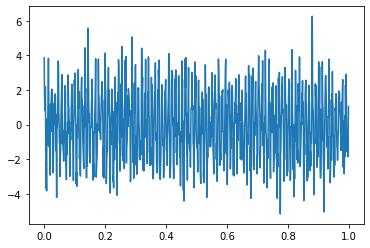

In [4]:
plt.plot(time, x)

In [5]:
N = len(x)
f = np.fft.fftfreq(N, d = tsample)
y = np.fft.fft(x)
y = np.abs(y) / N
f, y = f[:N // 2], y[:N // 2] * 2

In [6]:
# find peaks: simple method 
max_index, min_index = np.argmax(y), np.argmin(y) 
print(f'Amplitude: {y[max_index] - y[min_index]}')
print(f'Frequency: {f[max_index]}')

Amplitude: 2.190136102590481
Frequency: 91.0


[]

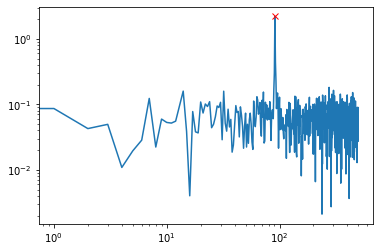

In [7]:
plt.plot(f, y)
plt.plot(f[max_index], y[max_index], 'xr')
plt.loglog()

## Part 2: averaging
Now, imagine you have many data sets to average, but you don't know if the phases are aligned. We can't average the timestreams, because the phase missalignment will disrupt the signal. However, the FFT removes the phase dependence, so we can average the FFT to lower the noise.

In [18]:
import numpy as np 
import matplotlib.pyplot as plt
fsample = 1000 # 1 kHz 
tsample = 1 / fsample
time = np.arange(0, 1, tsample)
frequency = np.random.uniform(0.1, 100)
amplitude = np.random.uniform(0.1, 10)
xs = []
for delta in np.random.uniform(-np.pi, np.pi, 20):
    x = amplitude * np.sin(2 * np.pi * time * frequency + delta)
    noise = 10 * amplitude * np.random.normal(0, 1, len(time))
    x += noise
    xs.append(x)
del frequency, amplitude

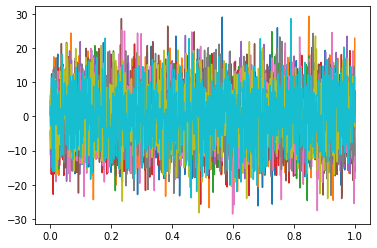

In [19]:
[plt.plot(time, x) for x in xs[::2]];

In [20]:
ys = []
N = len(x)
f = np.fft.fftfreq(N, d = tsample)
f = f[:N // 2]
for x in xs:
    y = np.fft.fft(x)
    y = np.abs(y) / N
    y = y[:N // 2] * 2
    ys.append(y)

In [21]:
y_avg = np.mean(ys, axis = 0)

In [22]:
max_index = np.argmax(y_avg) 
print(f'Amplitude: {y_avg[max_index]}')
print(f'Frequency: {f[max_index]}')

Amplitude: 0.8051576027335065
Frequency: 91.0


[]

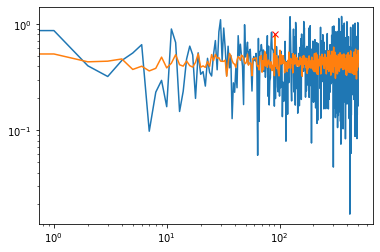

In [23]:
plt.plot(f, ys[0])
plt.plot(f, y_avg)
plt.plot(f[max_index], y_avg[max_index], 'xr')
plt.loglog()